<a href="https://colab.research.google.com/github/Aaradhy23/projects/blob/main/real_estate_price_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)


In [2]:
df1= pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.groupby('area_type')['area_type'].agg('count')#basically to group the data according to categories of areas

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
#dropping the irrelevant columns
df2= df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


data cleaning handlind na values

In [5]:
df2.isnull().sum()#checking for null values

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
#as number of na values are very small compared to total dataset therefore we can drop them
df3= df2.dropna()
df3.isnull().sum()
df3.shape


(13246, 5)

In [7]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df3.loc[:, 'BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
#gives two token out of which we take first column which is zero

<ipython-input-8-31b671e97502>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [9]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
df3[df3.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [11]:
df3.total_sqft.unique()#to convert range into a single number we take average of starting and ending

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
def isfloat(x):
  try:
    float(x)
  except:
    return False
  return True


In [13]:
df3[~df3['total_sqft'].apply(isfloat)].head()

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [14]:
def convert_sqft_to_num(x):
  tokens= x.split('-')
  if len(tokens)==2:
    return(float(tokens[0])+ float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None


In [15]:
 convert_sqft_to_num('2100-2850')

2475.0

In [16]:
df4= df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [17]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [18]:
df5= df4.copy()
#create a new feauture helpful for outlier detection
df5['price_per_sqft']= df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
len(df5.location.unique())#we cannot use one hot encoding as this will lead to 1300 features
#curse of dimmensionality
df5.location= df5.location.apply(lambda x: x.strip())#handles extra spaces at end beginning etc.
location_stats= df5.groupby('location')['location'].agg('count').sort_values(ascending=False)#group by location store in new column named location and agg of them in column named count
location_stats

location
Whitefield              535
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          266
Thanisandra             236
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
Kamdhenu Nagar            1
Kanakadasa Layout         1
K N Extension             1
Name: location, Length: 1293, dtype: int64

In [20]:
len(location_stats[location_stats<=10])#how many rows have less than 10 data stats

1052

In [21]:
location_stats_lessthan_10= location_stats[location_stats<=10]
location_stats_lessthan_10#cetegorise them as other

location
Sadashiva Nagar         10
Nagappa Reddy Layout    10
Naganathapura           10
Nagadevanahalli         10
Sector 1 HSR Layout     10
                        ..
Kalhalli                 1
Kalkere Channasandra     1
Kamdhenu Nagar           1
Kanakadasa Layout        1
K N Extension            1
Name: location, Length: 1052, dtype: int64

In [22]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_lessthan_10 else x)#categorise our less than as others rest remain as they are
len(df5.location.unique())
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


outlier detection and removal

In [23]:
df6= df5[~(df5.total_sqft/df5.BHK<300)]#df6 is dataframe removing all those whose total sqft/bhk is less than 300
df6.shape

(12502, 7)

In [24]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [25]:
#remove outliers of price_per_sqft per location
def remove_pps_outliers(df):
  df_out= pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m= np.mean(subdf.price_per_sqft)#mean
    st= np.std(subdf.price_per_sqft)#standard deviation
    reduced_df=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))] #price greater than mean +standard deviation and price less than mean plus standard deviation
    df_out= pd.concat([df_out,reduced_df],ignore_index= True)
  return df_out
df7= remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [26]:
#function to plot bhk prices vs area
def plot_scatter_chart(df,location):
  bhk2=df[(df.location==location)&(df.BHK==2)]
  bhk3=df[(df.location==location)&(df.BHK==3)]
  matplotlib.rcParams['figure.figsize']=(15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s= 50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
  plt.xlabel('Total Square Feet Area')
  plt.ylabel('Price per square feet')
  plt.title(location)
  plt.legend()

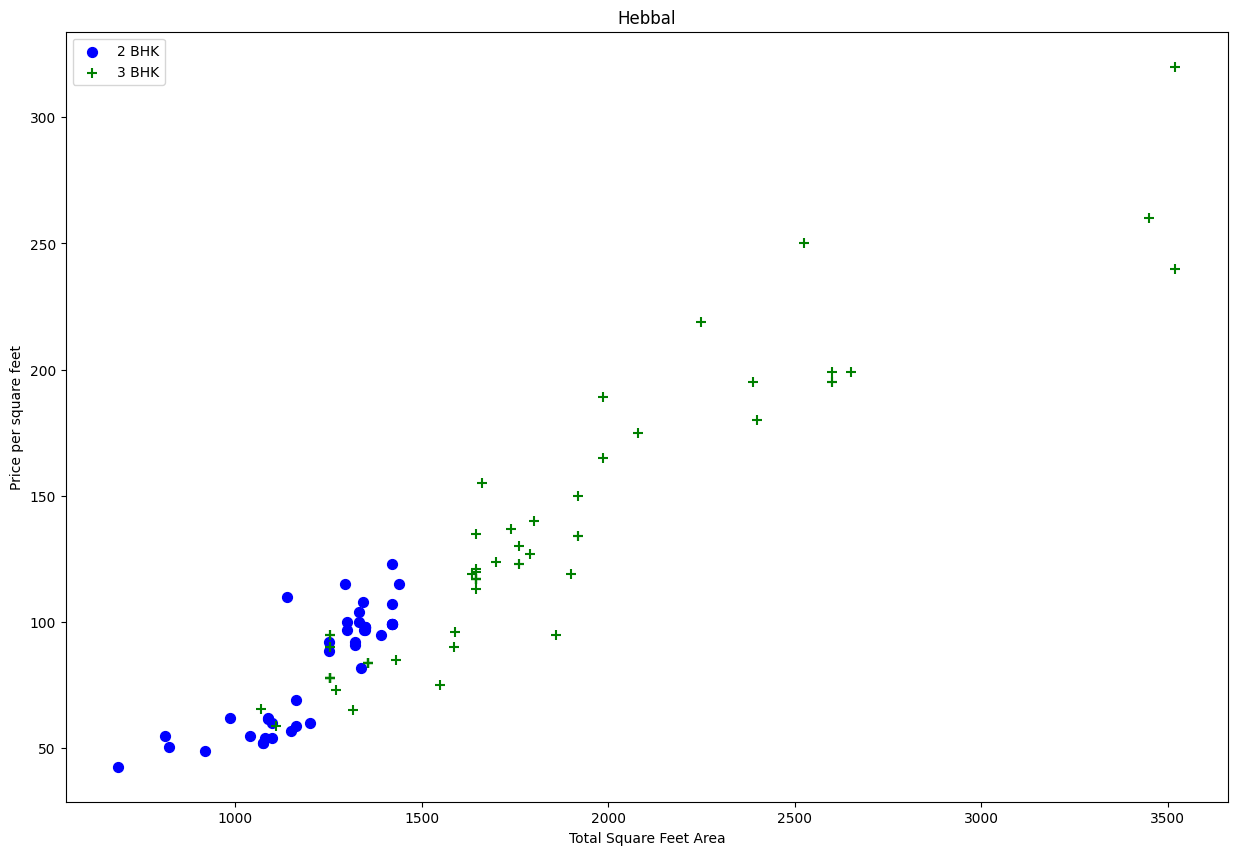

In [27]:
plot_scatter_chart(df7,'Hebbal')

In [28]:

def remove_bhk_outliers(df):
  exclude_indices= np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats={}
    for BHK,bhk_df in location_df.groupby('BHK'):
      bhk_stats[BHK]={#computing parameters for each bhk
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
      for BHK,bhk_df in location_df.groupby('BHK'):
        stats= bhk_stats.get(BHK-1)
        if stats and stats['count']>5:
          exclude_indices= np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)#exclude those values whose price per sqft is less than the mean
  return df.drop(exclude_indices,axis='index')

df8= remove_bhk_outliers(df7)
df8.shape

(7329, 7)

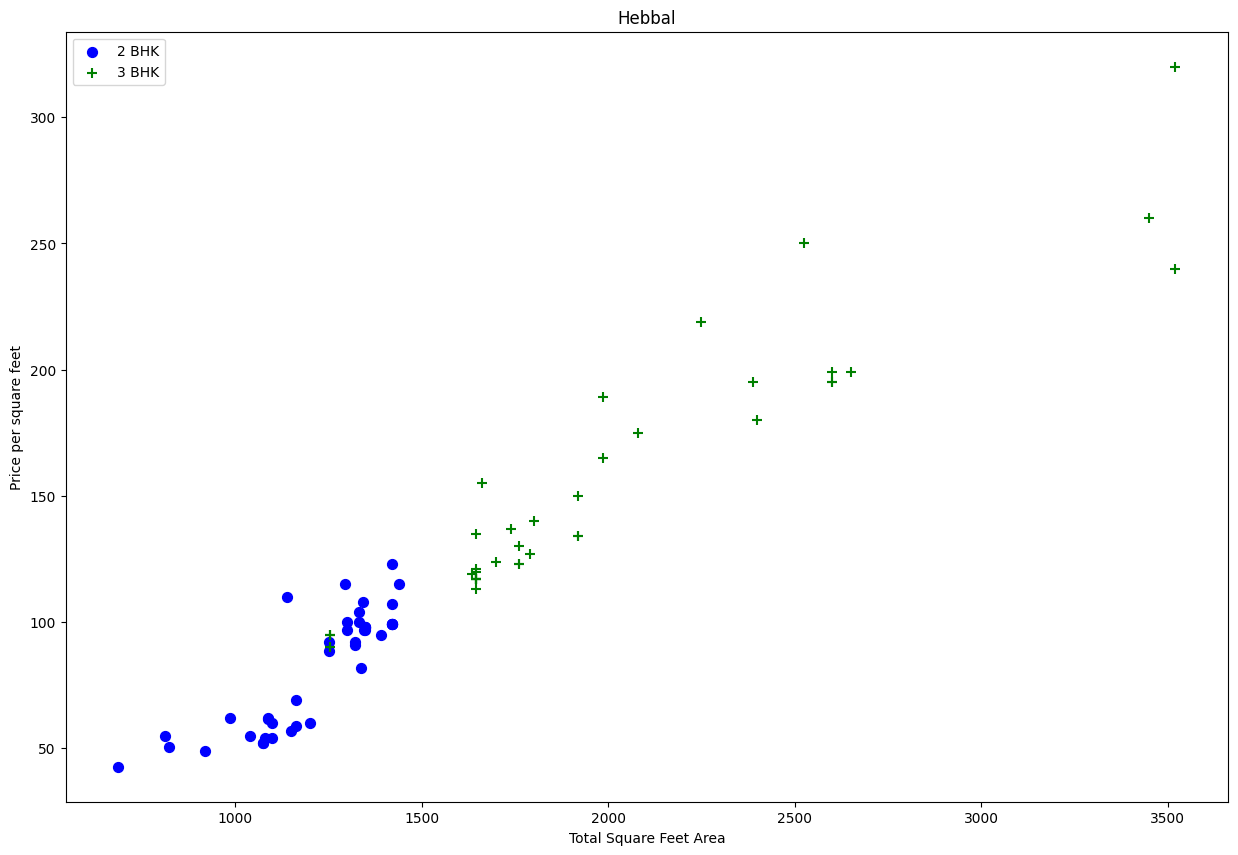

In [29]:
plot_scatter_chart(df8,'Hebbal')#now we plot after outlier removal

Text(0, 0.5, 'count')

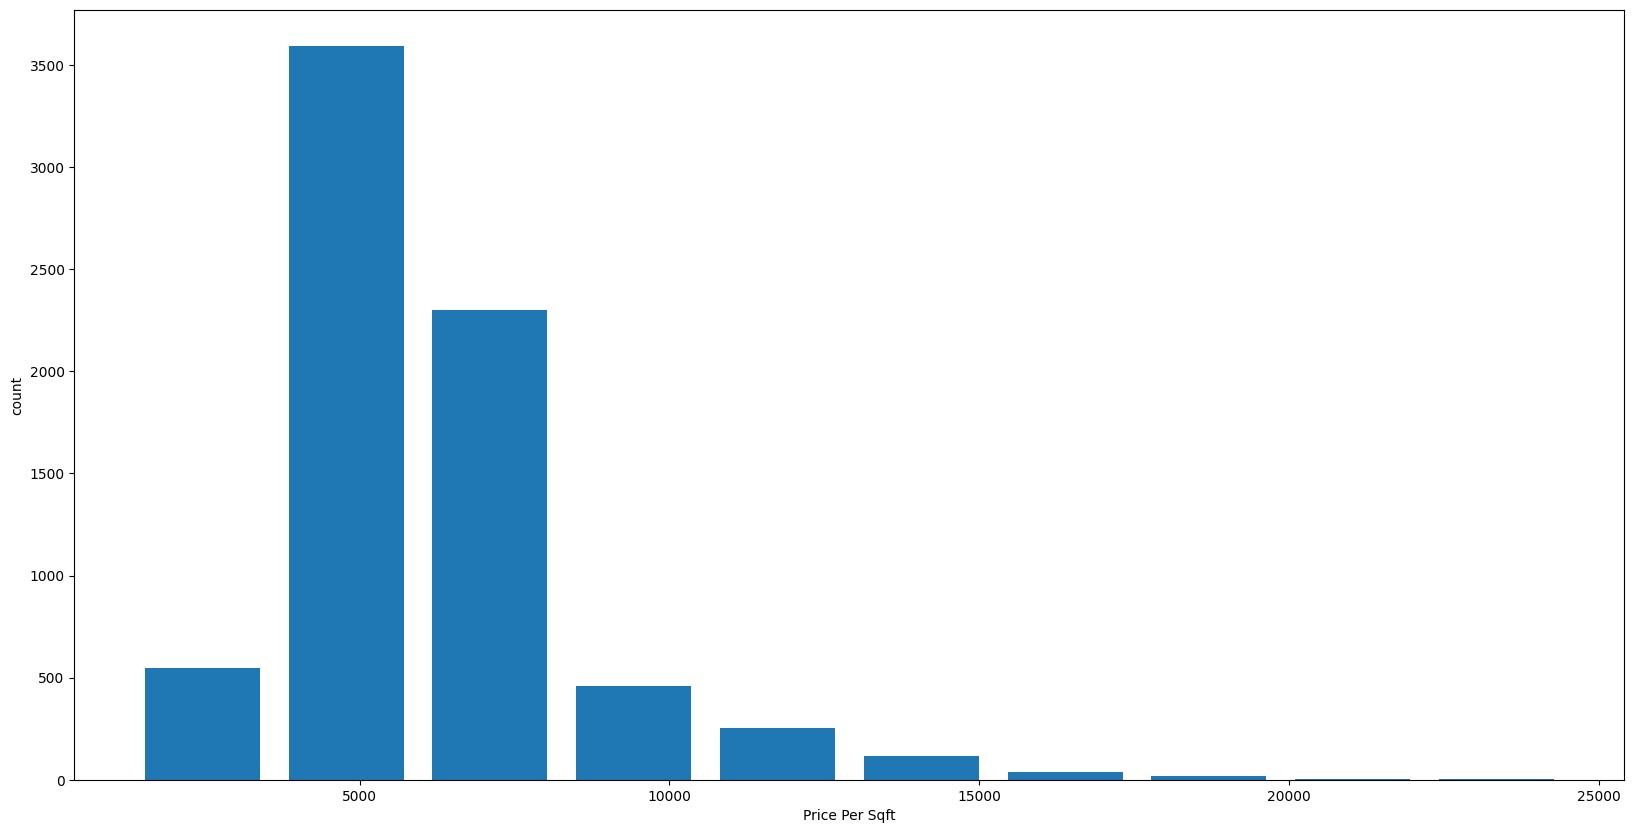

In [30]:
#plotting histogram
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Sqft")
plt.ylabel("count")

In [31]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [32]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [ ]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("number of bathrooms")
plt.ylabel('count')

In [34]:
#criteria for bathroom outlier removal
df9= df8[df8.bath<df8.BHK+2]
df9.shape

(7251, 7)

In [35]:
#now we can drop price_per_sqft and size because they are not needed for model training\
#they were necessary for data cleaning

In [36]:
df10= df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


BUILDING MODEL

In [37]:
dummies= pd.get_dummies(df10.location)

In [38]:
df11= pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')#to avoid dummy variable trap we use one less column
df11.head(3)
df12= df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Model starts now

In [39]:
X= df12.drop('price',axis='columns')#only independent variables in our model
X.head()
y= df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [41]:
from sklearn.linear_model import LinearRegression
lr_clf= LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.8452277697874306

In [42]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits= 5, test_size=0.2, random_state= 0)#shuffle split for cross validation
#shuffle split will randomize the model so each of the fold have equal distribution of data samples
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [43]:
#grid search cv can run our model on different regressors and different parameter and tell us the best score
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                # Remove 'normalize' from parameters
                # 'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [44]:
def predict_price(location,sqft,bath,BHK):
  loc_index= np.where(X.columns==location)[0][0]
  x= np.zeros(len(X.columns))
  x[0]= sqft
  x[1]= bath
  x[2]= BHK
  if loc_index>=0:
    x[loc_index]=1
  return lr_clf.predict([x])[0]

In [45]:
predict_price('1st Phase JP Nagar',1000,2,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677177781

for flasking server and hosting etc. starts from here

In [46]:
#for flasking server and hosting etc. starts from here
import pickle
with open('bangalore_home_prices_model.pickle','wb') as f:
  pickle.dump(lr_clf,f)

In [47]:
import json
columns= {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
  f.write(json.dumps(columns))